# 1. Introduction

A complex network is a mathematical abstraction used to represent systems composed of a large number of interacting units whose collective behavior cannot be trivially reduced to the sum of their parts. Formally, we can describe a network as a graph

$$G=(V,E),$$

where $V$ is the set of nodes (also called vertices), representing the elements of the system. These could be people, proteins, computers, neurons, cities, or even abstract entities like concepts in a knowledge network. $E$ is the set of edges (also called links), representing the connections or relationships between nodes. These could be friendships, biochemical reactions, communication channels, power lines, or trade relations.

What makes a network complex is that its structure is neither perfectly regular (like a lattice) nor entirely random. Instead, real networks often display non-trivial features such as:

- highly connected hubs,
- tightly knit communities,
- short paths across the entire system,
- and heterogeneous connection patterns.

These properties give rise to behaviors that cannot be predicted by looking at individual components in isolation.

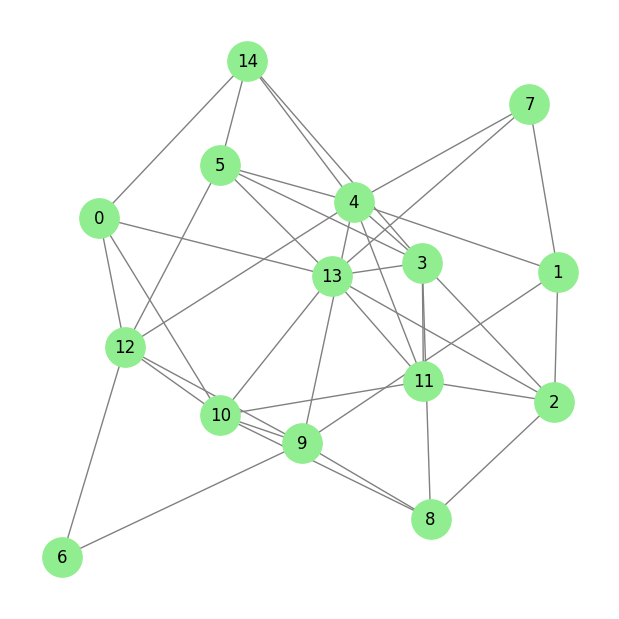

In [31]:
#Let's construct our first network. 
#We will focus in the computational aspect of networks later in this notebook

import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(15, 0.3)

plt.figure(figsize=(6,6))
nx.draw(
    G, 
    with_labels=True,
    node_color="lightgreen",
    node_size=800,
    edge_color="gray",
    font_size=12
)
plt.show()

# 2. Why Complex Networks Matter

The study of complex networks provides a universal language to describe systems across disciplines. Instead of treating each system separately, we abstract them into nodes and edges, and then apply common tools. This allows discoveries in one field to inform another, revealing underlying principles that govern seemingly unrelated domains.

For example:

- The mathematics used to describe the spread of an epidemic can also be used to study how computer viruses propagate in the Internet, or how rumors and misinformation spread in social media platforms.
- Insights into the resilience of power grids can help us understand the robustness of ecosystems, where the removal of a highly connected species (a keystone predator, for instance) can destabilize the entire food web.
- The analysis of collaboration networks in science can be extended to study innovation and diffusion of ideas in society, as well as the spread of technologies across countries or industrial sectors.
- Models originally designed for transportation networks (air traffic or urban mobility) can be applied to neuronal pathways in the brain, helping us understand how signals efficiently travel across different regions.
- Research on financial networks—where banks and institutions are nodes linked by lending or trading—has informed strategies to mitigate systemic risk, in a manner directly comparable to containing cascades of failure in infrastructure networks.

Thus, complex networks serve as a bridge between different sciences, unifying them under a shared framework. By translating diverse systems into networks, we gain the ability to recognize common structural patterns, identify universal mechanisms, and transfer solutions from one field to another.

# 3. Structural Properties and Metrics in Complex Networks  

Real-world networks are not random; they exhibit **recurring structural patterns** across domains. These properties can be quantified with a variety of **network metrics**, each capturing a different aspect of topology.  


## 3.1 Degree Distribution  

The **degree** of a node $i$ is the number of edges incident upon it:  


$$k_i = \sum_{j \in V} A_{ij},$$
 

where $A_{ij}$ is the adjacency matrix $(A_{ij} = 1$ if $i$ is connected to $j$, and $0$ otherwise).  

The **degree distribution** is the probability \(P(k)\) that a randomly chosen node has degree \(k\). In scale-free networks,  

$$P(k) \sim k^{-\gamma}, \quad \gamma > 1.$$ 

Some common degree distributions observed in real-world networks, with examples, are:

### 3.1.1 Poisson Distribution (Random Networks)  

In **Erdős–Rényi random graphs**, degrees follow a Poisson distribution:  

$$P(k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad \lambda = \langle k \rangle,$$ 

- Most nodes have degree close to the mean.  
- Hubs are extremely unlikely.  
- Example: Some engineered networks, where connections are uniformly distributed.


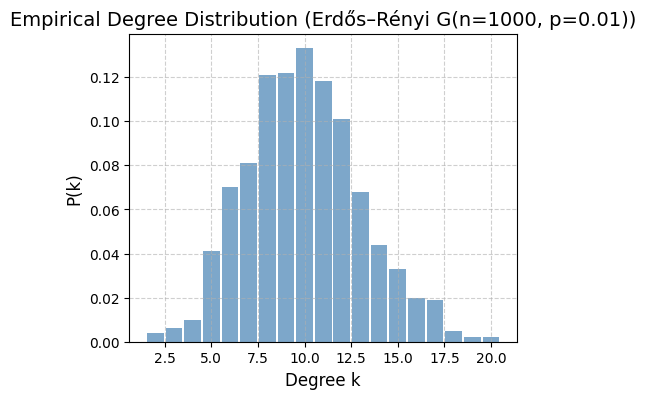

Expected average degree λ = 9.99
Empirical average degree = 9.97


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
n = 1000    # number of nodes
p = 0.01    # edge probability
seed = 42   # reproducibility

# Generate Erdős–Rényi random graph
G = nx.erdos_renyi_graph(n=n, p=p, seed=seed)

# Degree sequence
degrees = [d for _, d in G.degree()]
unique, counts = np.unique(degrees, return_counts=True)

# Normalize to get probabilities
probabilities = counts / counts.sum()

# Plot empirical degree distribution
plt.figure(figsize=(5,4))
plt.bar(unique, probabilities, width=0.9, alpha=0.7, color="steelblue")
plt.title(f"Empirical Degree Distribution (Erdős–Rényi G(n={n}, p={p}))", fontsize=14)
plt.xlabel("Degree k", fontsize=12)
plt.ylabel("P(k)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Print stats
print(f"Expected average degree λ = {p*(n-1):.2f}")
print(f"Empirical average degree = {np.mean(degrees):.2f}")


### 3.1.2 Binomial Distribution (Finite Random Networks)  

For a network with $N$ nodes and independent probability $p$ of an edge between any two nodes,  

$$P(k) = \binom{N-1}{k} p^k (1-p)^{N-1-k}.$$ 

- Approximates a Poisson distribution for large $N$ and small $p$.  
- Useful for finite-size Erdős–Rényi graphs.  

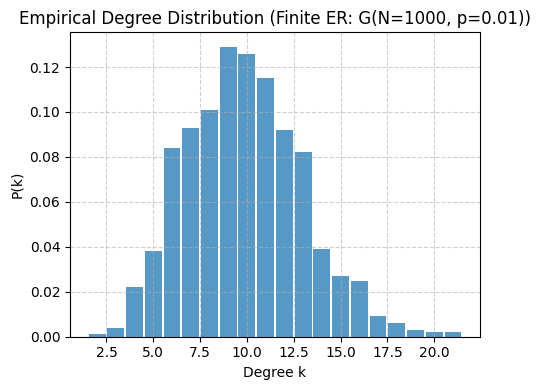

Binomial E[k] = (N-1)p = 9.990
Empirical mean degree = 9.862
Binomial Var[k] = (N-1)p(1-p) = 9.890
Empirical variance = 9.627


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# --- Parameters (finite N) ---
N = 1_000    # number of nodes
p = 0.01     # independent edge probability
seed = 3405    # reproducibility

# --- Build finite Erdős–Rényi random graph G(N, p) ---
G = nx.erdos_renyi_graph(n=N, p=p, seed=seed, directed=False)

# --- Degree sequence & empirical PMF ---
degrees = np.fromiter((d for _, d in G.degree()), dtype=int)
k_vals, counts = np.unique(degrees, return_counts=True)
empirical_p = counts / counts.sum()

# --- Plot empirical degree distribution (Binomial in finite ER) ---
plt.figure(figsize=(5,4))
plt.bar(k_vals, empirical_p, width=0.9, alpha=0.75)
plt.title(f"Empirical Degree Distribution (Finite ER: G(N={N}, p={p}))")
plt.xlabel("Degree k")
plt.ylabel("P(k)")
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Binomial expectations for sanity checks ---
binom_mean = (N - 1) * p
binom_var  = (N - 1) * p * (1 - p)

print(f"Binomial E[k] = (N-1)p = {binom_mean:.3f}")
print(f"Empirical mean degree = {degrees.mean():.3f}")
print(f"Binomial Var[k] = (N-1)p(1-p) = {binom_var:.3f}")
print(f"Empirical variance = {degrees.var(ddof=0):.3f}")


### 3.1.3 Power-Law Distribution (Scale-Free Networks)  

Many real-world networks exhibit a **scale-free degree distribution**, characterized by a heavy tail:  

$$P(k) \sim k^{-\gamma}, \quad \gamma > 1.$$ 

- A few hubs have very high degree, while most nodes have few connections.  
- Example: The Internet, citation networks, airline networks.  

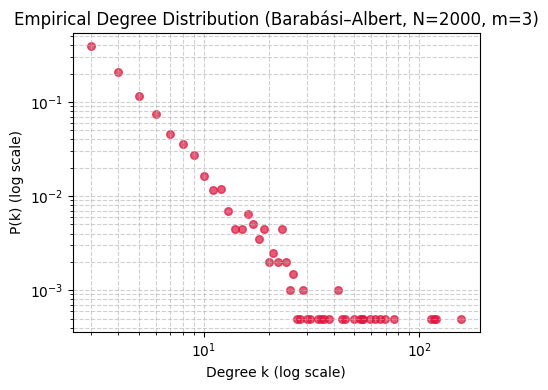

Number of nodes: 2000, edges per new node: 3
Empirical average degree = 5.99


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# --- Parameters for Barabási–Albert model ---
N = 2000   # number of nodes
m = 3      # number of edges each new node attaches with
seed = 42  # reproducibility

# --- Generate Barabási–Albert scale-free network ---
G = nx.barabasi_albert_graph(n=N, m=m, seed=seed)

# --- Degree sequence & empirical distribution ---
degrees = np.fromiter((d for _, d in G.degree()), dtype=int)
k_vals, counts = np.unique(degrees, return_counts=True)
empirical_p = counts / counts.sum()

# --- Plot empirical degree distribution ---
plt.figure(figsize=(5,4))
plt.scatter(k_vals, empirical_p, alpha=0.7, s=30, color="crimson")
plt.xscale("log")
plt.yscale("log")
plt.title(f"Empirical Degree Distribution (Barabási–Albert, N={N}, m={m})")
plt.xlabel("Degree k (log scale)")
plt.ylabel("P(k) (log scale)")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Stats ---
print(f"Number of nodes: {N}, edges per new node: {m}")
print(f"Empirical average degree = {degrees.mean():.2f}")

### 3.1.4 Exponential Distribution  

In some networks, the probability of high-degree nodes decays exponentially:  

$$P(k) \sim e^{-\alpha k}.
$$  

- Less heterogeneous than power-law.  
- Still allows variability, but hubs are unlikely.  
- Example: Certain social or technological networks with resource constraints. 

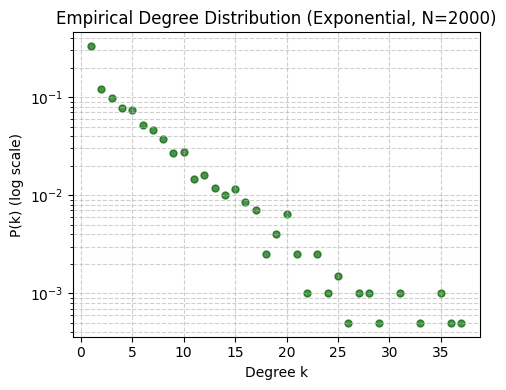

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# --- Parameters ---
N = 2000         # number of nodes
scale = 5        # scale parameter for exponential distribution (mean degree)
seed = 42
rng = np.random.default_rng(seed)

# --- Generate degree sequence from exponential distribution ---
degrees = rng.exponential(scale=scale, size=N).astype(int)

# Ensure all degrees >= 1 (configuration_model requires positive even sum)
degrees[degrees < 1] = 1
if degrees.sum() % 2 != 0:  # must be even for configuration model
    degrees[0] += 1

# --- Build random network with exponential degree sequence ---
G = nx.configuration_model(degrees, seed=seed)
G = nx.Graph(G)   # remove parallel edges
G.remove_edges_from(nx.selfloop_edges(G))  # remove self-loops

# --- Empirical degree distribution ---
deg_sequence = [d for _, d in G.degree()]
k_vals, counts = np.unique(deg_sequence, return_counts=True)
empirical_p = counts / counts.sum()

# --- Plot empirical distribution ---
plt.figure(figsize=(5,4))
plt.scatter(k_vals, empirical_p, color="darkgreen", alpha=0.7, s=25)
plt.yscale("log")
plt.title(f"Empirical Degree Distribution (Exponential, N={N})")
plt.xlabel("Degree k")
plt.ylabel("P(k) (log scale)")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 3.1.5 Stretched Exponential (Weibull)  

Intermediate between power-law and exponential:  

$$P(k) \sim e^{-\alpha k^{\beta}}, \quad 0 < \beta < 1.
$$  

- Captures networks that are neither purely scale-free nor exponential.  
- Example: Some collaboration and communication networks.  

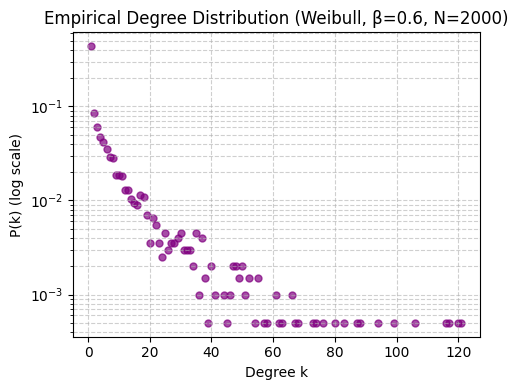

Target Weibull β = 0.6, scale = 5.0
Empirical mean degree = 7.36


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# --- Parameters ---
N = 2000         # number of nodes
scale = 5.0      # scale parameter (λ) for Weibull
beta = 0.6       # shape parameter (0 < β < 1 => stretched exponential)
seed = 42
rng = np.random.default_rng(seed)

# --- Generate degree sequence from Weibull distribution ---
# numpy gives samples from Weibull with PDF ~ (β * x^(β-1)) * exp(-x^β)
# scale it to get desired degree range
degrees = (rng.weibull(beta, size=N) * scale).astype(int)

# Ensure valid sequence for configuration model
degrees[degrees < 1] = 1
if degrees.sum() % 2 != 0:
    degrees[0] += 1

# --- Build random network from degree sequence ---
G = nx.configuration_model(degrees, seed=seed)
G = nx.Graph(G)  # remove parallel edges
G.remove_edges_from(nx.selfloop_edges(G))

# --- Empirical degree distribution ---
deg_sequence = [d for _, d in G.degree()]
k_vals, counts = np.unique(deg_sequence, return_counts=True)
empirical_p = counts / counts.sum()

# --- Plot empirical distribution ---
plt.figure(figsize=(5,4))
plt.scatter(k_vals, empirical_p, color="purple", alpha=0.7, s=25)
plt.yscale("log")
plt.title(f"Empirical Degree Distribution (Weibull, β={beta}, N={N})")
plt.xlabel("Degree k")
plt.ylabel("P(k) (log scale)")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Quick stats ---
print(f"Target Weibull β = {beta}, scale = {scale}")
print(f"Empirical mean degree = {np.mean(deg_sequence):.2f}")


### 3.1.6 Log-Normal Distribution  

Another common heavy-tailed distribution:  

$$P(k) = \frac{1}{k \sigma \sqrt{2\pi}} \exp \left( - \frac{(\ln k - \mu)^2}{2\sigma^2} \right),
$$ 

where $\mu$ and $\sigma$ are the mean and standard deviation of $\ln k$.  

- Degree distribution arises from **multiplicative growth processes**.  
- Example: Wealth distributions, metabolic networks, and some online networks.  



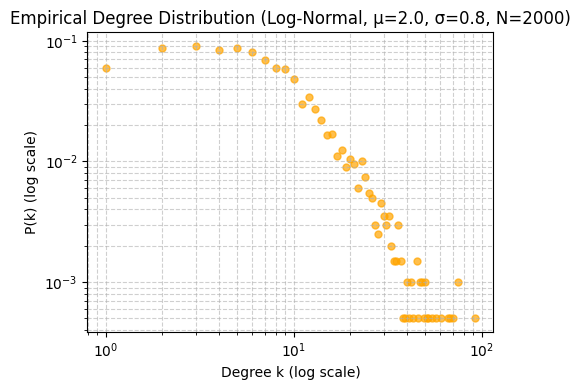

Target log-normal parameters: μ=2.0, σ=0.8
Empirical mean degree = 9.15
Empirical max degree = 92


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# --- Parameters ---
N = 2000         # number of nodes
mu = 2.0         # mean of log(degree)
sigma = 0.8      # std dev of log(degree)
seed = 42
rng = np.random.default_rng(seed)

# --- Generate degree sequence from log-normal distribution ---
degrees = rng.lognormal(mean=mu, sigma=sigma, size=N).astype(int)

# Ensure validity for configuration model
degrees[degrees < 1] = 1
if degrees.sum() % 2 != 0:
    degrees[0] += 1

# --- Build random network from degree sequence ---
G = nx.configuration_model(degrees, seed=seed)
G = nx.Graph(G)  # remove parallel edges
G.remove_edges_from(nx.selfloop_edges(G))

# --- Empirical degree distribution ---
deg_sequence = [d for _, d in G.degree()]
k_vals, counts = np.unique(deg_sequence, return_counts=True)
empirical_p = counts / counts.sum()

# --- Plot empirical distribution ---
plt.figure(figsize=(5,4))
plt.scatter(k_vals, empirical_p, color="orange", alpha=0.7, s=25)
plt.xscale("log")
plt.yscale("log")
plt.title(f"Empirical Degree Distribution (Log-Normal, μ={mu}, σ={sigma}, N={N})")
plt.xlabel("Degree k (log scale)")
plt.ylabel("P(k) (log scale)")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Quick stats ---
print(f"Target log-normal parameters: μ={mu}, σ={sigma}")
print(f"Empirical mean degree = {np.mean(deg_sequence):.2f}")
print(f"Empirical max degree = {np.max(deg_sequence)}")


## 3.2 Clustering Coefficient  

The **local clustering coefficient** of node $i$ measures how close its neighbors are to forming a complete clique:  

$$C_i = \frac{2 e_i}{k_i (k_i - 1)},
$$ 

where $e_i$ is the number of edges among the neighbors of $i$.  

The **average clustering coefficient** of the network is:  

$$C = \frac{1}{N} \sum_{i=1}^N C_i.
$$  

**Example:** In social networks, “friends of friends” are often themselves friends.  


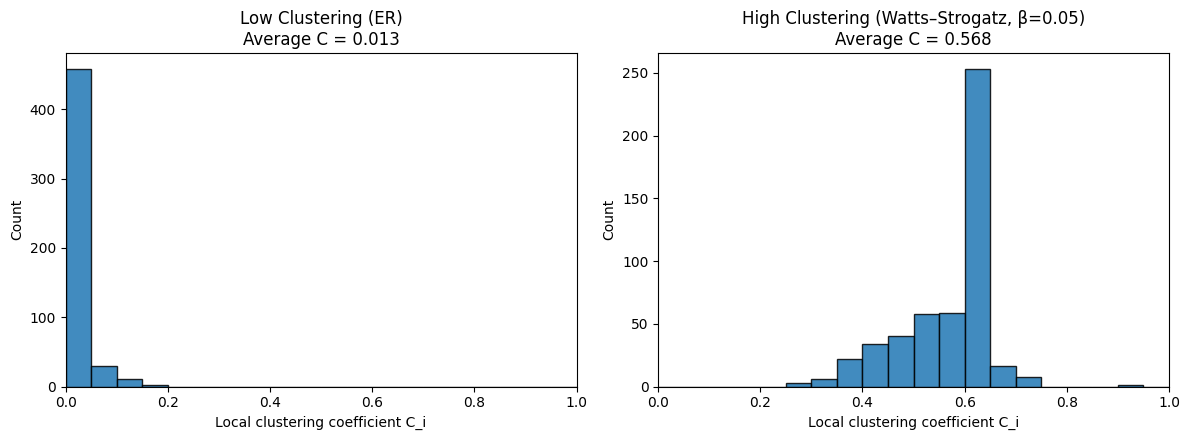

ER:    avg degree ~ 7.84, avg clustering = 0.013
WS:    avg degree ~ 8.00, avg clustering = 0.568


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# --- Parameters (keep average degree ~k_target across both graphs) ---
N = 500
k_target = 8               # target average degree
p_er = k_target / (N - 1)  # ER edge probability for ~k_target
k_ws = k_target            # each node connected to k_ws nearest neighbors in WS
beta_ws = 0.05             # low rewiring -> high clustering
seed = 42

# --- Build graphs ---
G_lowC  = nx.erdos_renyi_graph(n=N, p=p_er, seed=seed)                 # low clustering
G_highC = nx.watts_strogatz_graph(n=N, k=k_ws, p=beta_ws, seed=seed)   # high clustering

# --- Local clustering coefficients ---
Ci_low  = np.fromiter(nx.clustering(G_lowC).values(), dtype=float)
Ci_high = np.fromiter(nx.clustering(G_highC).values(), dtype=float)

# --- Averages ---
Cavg_low  = nx.average_clustering(G_lowC)
Cavg_high = nx.average_clustering(G_highC)

# --- Plot histograms side-by-side ---
bins = np.linspace(0, 1, 21)

plt.figure(figsize=(12, 4.5))

plt.subplot(1, 2, 1)
plt.hist(Ci_low, bins=bins, alpha=0.85, edgecolor="black")
plt.title(f"Low Clustering (ER)\nAverage C = {Cavg_low:.3f}")
plt.xlabel("Local clustering coefficient C_i")
plt.ylabel("Count")
plt.xlim(0, 1)

plt.subplot(1, 2, 2)
plt.hist(Ci_high, bins=bins, alpha=0.85, edgecolor="black")
plt.title(f"High Clustering (Watts–Strogatz, β={beta_ws})\nAverage C = {Cavg_high:.3f}")
plt.xlabel("Local clustering coefficient C_i")
plt.ylabel("Count")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# Optional: print quick sanity checks
print(f"ER:    avg degree ~ {np.mean([d for _, d in G_lowC.degree()]):.2f}, avg clustering = {Cavg_low:.3f}")
print(f"WS:    avg degree ~ {np.mean([d for _, d in G_highC.degree()]):.2f}, avg clustering = {Cavg_high:.3f}")


## 3.3 Small-World Property (Average Path Length)  

The **shortest path length** between nodes $i$ and $j$ is denoted $d(i,j)$. The **average path length** of the network is:  

$$L = \frac{1}{N(N-1)} \sum_{i \neq j} d(i,j).
$$ 

**Example:** Despite its size, the World Wide Web exhibits paths of only a few clicks between websites.  


## 3.4 Community Structure (Modularity)  

Networks often contain **modules or communities**. A common measure of modularity (Newman–Girvan) is:  

$$Q = \frac{1}{2m} \sum_{i,j} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \delta(c_i, c_j),
$$ 

where $m$ is the total number of edges, $c_i$ is the community of node $i$, and $\delta$ is the Kronecker delta.  

**Example:** In citation networks, communities correspond to distinct research fields.  


## 3.5 Assortativity (Degree Correlation)  

The **assortativity coefficient** $r$ measures whether nodes connect preferentially to nodes with similar degree:  

$$r = \frac{\sum_{jk} jk (e_{jk} - q_j q_k)}{\sigma_q^2},
$$ 

where $e_{jk}$ is the joint probability distribution of the degrees at the ends of an edge, $q_k$ is the normalized degree distribution, and $\sigma_q^2$ is its variance.  

**Example:** Social networks tend to be assortative, while technological networks are disassortative.  


## 3.6 Betweenness Centrality  

Measures how often a node lies on the **shortest paths** between other nodes:  

$$BC(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}},
$$  

where $\sigma_{st}$ is the number of shortest paths between $s$ and $t$, and $\sigma_{st}(v)$ is the number of those passing through $v$.  

**Example:** Airports like Dubai or Singapore often act as key transfer hubs.  


## 3.7 Closeness Centrality  

Measures how close a node is to all others in terms of path length:  

$$CC(v) = \frac{1}{\sum_{u \in V} d(v,u)}.
$$ 

**Example:** In communication networks, a node with high closeness centrality can spread information efficiently.  


## 3.8 Eigenvector Centrality  

Assigns importance to a node based on its connections to other important nodes:  

$$x_i = \frac{1}{\lambda} \sum_{j} A_{ij} x_j,
$$ 

where $\lambda$ is the largest eigenvalue of $A$.  

**Example:** Google’s **PageRank** is a variant of this measure.  


## 3.9 Network Density  

The **density** of a network quantifies how many edges are present compared to the maximum possible:  

$$D = \frac{2m}{N(N-1)},
$$  

where $m$ is the number of edges, and $N$ the number of nodes.  

**Example:** A complete graph has density $D=1$, while sparse real-world networks have low density.  


## 3.10 Diameter  

The **diameter** of a network is the maximum shortest path between any two nodes:  

$$D_{\text{max}} = \max_{i,j} d(i,j).
$$ 

**Example:** In a social network, this corresponds to the longest “chain” of acquaintances linking two people.  


## 3.11 Motifs  

A **network motif** is a small, recurring subgraph pattern that appears more frequently than expected in a random network.  

The **Z-score** is often used to measure motif significance:  

$$Z_m = \frac{N_m^{\text{real}} - \langle N_m^{\text{rand}} \rangle}{\sigma(N_m^{\text{rand}})},
$$

where $N_m^{\text{real}}$ is the number of motif $m$ in the real network, and the denominator normalizes against random expectation.  

**Example:** Feed-forward loops are common motifs in gene regulatory networks.